# Read Data

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("stroke.csv")

In [3]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1,67,0,1,1,1,228.69,36.6,1,1,0,0,1,0,0
1,31112,1,80,0,1,1,0,105.92,32.5,0,1,0,0,1,0,0
2,60182,0,49,0,0,1,1,171.23,34.4,2,1,0,0,1,0,0
3,1665,0,79,1,0,1,0,174.12,24.0,0,1,0,0,0,1,0
4,56669,1,81,0,0,1,1,186.21,29.0,1,1,0,0,1,0,0


#  Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split
x_col = [ 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
        'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children']
y_col = 'stroke'

X_train, X_test, Y_train, Y_test = train_test_split(df[x_col],df[[y_col]], random_state=0)

# Naive bayes

In [5]:
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

nb = GaussianNB()
smote = SMOTE(random_state = 0)
X_train_new, Y_train_new = smote.fit_resample(X_train,Y_train)
nb.fit(X_train_new, Y_train_new)

GaussianNB()

In [6]:
from sklearn.metrics import classification_report

y_pred = nb.predict(X_test)

nb_report = classification_report(Y_test, y_pred)
print(nb_report)

              precision    recall  f1-score   support

           0       0.97      0.22      0.36       817
           1       0.05      0.88      0.10        40

    accuracy                           0.25       857
   macro avg       0.51      0.55      0.23       857
weighted avg       0.93      0.25      0.35       857



# Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

## class weight

In [8]:
scorer = make_scorer(f1_score, greater_is_better=True,  pos_label=1)
param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']}

log_model = LogisticRegression(class_weight='balanced', random_state=0)
log_grid = GridSearchCV(log_model, param_grid=param_grid, cv = 10, refit=True, scoring= scorer)
log_grid.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring=make_scorer(f1_score, pos_label=1))

## smote

In [9]:
scorer = make_scorer(f1_score, greater_is_better=True,  pos_label=1)
param_grid={'classification__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classification__penalty': ['l1', 'l2']}

model = LogisticRegression(random_state=0)
log_model = Pipeline([
        ('sampling', SMOTE()),
        ('classification', model)
    ])

log_smote_grid = GridSearchCV(log_model, param_grid=param_grid, cv = 10, refit=True, scoring=scorer)
log_smote_grid.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sampling', SMOTE()),
                                       ('classification',
                                        LogisticRegression(random_state=0))]),
             param_grid={'classification__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classification__penalty': ['l1', 'l2']},
             scoring=make_scorer(f1_score, pos_label=1))

# Decision Tree

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, make_scorer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

## class weight

In [11]:
depth =list(range(1, 20))

scorer = make_scorer(f1_score, greater_is_better=True,  pos_label=1)
param_grid = {"max_depth":depth}

tree_model = DecisionTreeClassifier(class_weight="balanced",random_state = 0)
tree_grid = GridSearchCV(tree_model, param_grid=param_grid, cv = 10, refit=True, scoring=scorer)
tree_grid.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]},
             scoring=make_scorer(f1_score, pos_label=1))

## smote

In [12]:
depth =list(range(1,15))

scorer = make_scorer(f1_score, greater_is_better=True,  pos_label=1)
param_grid = {"classification__max_depth":depth}

model = DecisionTreeClassifier(class_weight="balanced",random_state = 0)
tree_model = Pipeline([
        ('sampling', SMOTE()),
        ('classification', model)
    ])

tree_smote_grid = GridSearchCV(tree_model, param_grid=param_grid, cv = 10, refit=True, scoring=scorer)
tree_smote_grid.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sampling', SMOTE()),
                                       ('classification',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=0))]),
             param_grid={'classification__max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10, 11, 12, 13, 14]},
             scoring=make_scorer(f1_score, pos_label=1))

# Evaluation

## Precision Recall Curve

In [13]:
model_lst = [nb, log_grid, tree_grid, log_smote_grid, tree_smote_grid, ]
probs_lst = []

for i in range(len(model_lst)):
    probs = model_lst[i].predict_proba(X_test)
    probs = probs[:, 1]
    probs_lst.append(probs)

In [14]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import numpy as np
auc_lst = []
precision_lst = []
recall_lst = []

for i in range(len(probs_lst)):
    precision, recall, _ = precision_recall_curve(Y_test, probs_lst[i], pos_label=1)
    precision_lst.append(precision)
    recall_lst.append(recall)
    
    auc_score = auc(recall, precision)
    auc_lst.append(auc_score)

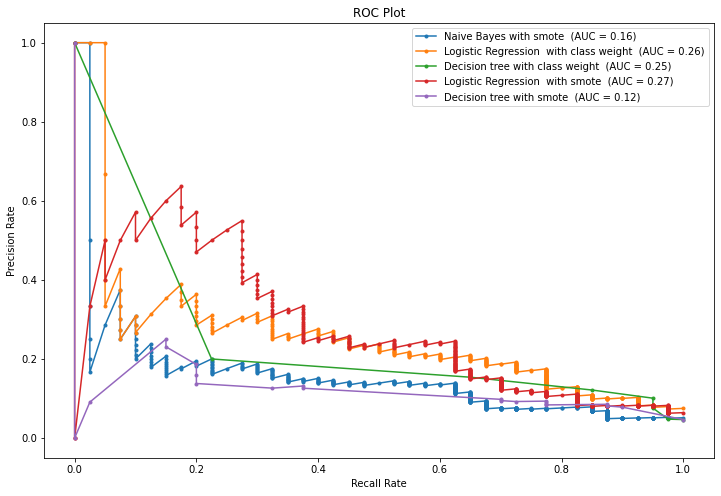

In [16]:
import matplotlib.pyplot as plt
model_name = ["Naive Bayes with smote",
              "Logistic Regression  with class weight",
              "Decision tree with class weight",
              "Logistic Regression  with smote",
              "Decision tree with smote"]

plt.figure(figsize=(12,8))
for i in range(len(model_name)):
    plt.plot(recall_lst[i], precision_lst[i], marker='.', label= model_name[i] + "  (AUC = %0.2f)"  % auc_lst[i])


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('Recall Rate')
plt.ylabel('Precision Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

Logistic Regression  with smote has the highest area under the curve of precision-recall curve.

## classification report

In [19]:
y_pred = log_smote_grid.predict(X_test)

report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.73      0.84       817
           1       0.12      0.72      0.20        40

    accuracy                           0.73       857
   macro avg       0.55      0.73      0.52       857
weighted avg       0.94      0.73      0.81       857

